LAB 11 Solutions and Explanations

Qn 1: Use the weblinks and reproduce the results for Linear regression, Logistic regression, SVM and PCA

A) Linear regression : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [563]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression

In [564]:
data = load_diabetes()
print("features:", list(data.feature_names))
print("target values:", list(data.target))

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

#print dataset dimensions and shape
print("X dim:",diabetes_X.ndim)
print("X rows/samples:",diabetes_X.shape[0])
print("X cols/features:",diabetes_X.shape[1])

print("y dim:",diabetes_y.ndim)
print("y rows/samples value:",diabetes_y.shape[0])

# Use only one feature for illustartion
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training & testing sets
diabetes_X_train = diabetes_X[:-30]
diabetes_X_test = diabetes_X[-30:]

# Split the targets into training & testing sets
diabetes_y_train = diabetes_y[:-30]
diabetes_y_test = diabetes_y[-30:]

features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
target values: [151.0, 75.0, 141.0, 206.0, 135.0, 97.0, 138.0, 63.0, 110.0, 310.0, 101.0, 69.0, 179.0, 185.0, 118.0, 171.0, 166.0, 144.0, 97.0, 168.0, 68.0, 49.0, 68.0, 245.0, 184.0, 202.0, 137.0, 85.0, 131.0, 283.0, 129.0, 59.0, 341.0, 87.0, 65.0, 102.0, 265.0, 276.0, 252.0, 90.0, 100.0, 55.0, 61.0, 92.0, 259.0, 53.0, 190.0, 142.0, 75.0, 142.0, 155.0, 225.0, 59.0, 104.0, 182.0, 128.0, 52.0, 37.0, 170.0, 170.0, 61.0, 144.0, 52.0, 128.0, 71.0, 163.0, 150.0, 97.0, 160.0, 178.0, 48.0, 270.0, 202.0, 111.0, 85.0, 42.0, 170.0, 200.0, 252.0, 113.0, 143.0, 51.0, 52.0, 210.0, 65.0, 141.0, 55.0, 134.0, 42.0, 111.0, 98.0, 164.0, 48.0, 96.0, 90.0, 162.0, 150.0, 279.0, 92.0, 83.0, 128.0, 102.0, 302.0, 198.0, 95.0, 53.0, 134.0, 144.0, 232.0, 81.0, 104.0, 59.0, 246.0, 297.0, 258.0, 229.0, 275.0, 281.0, 179.0, 200.0, 200.0, 173.0, 180.0, 84.0, 121.0, 161.0, 99.0, 109.0, 115.0, 268.0, 274.0, 158.0, 107.0, 83.0, 103.0, 272.0, 85.0

In [565]:
#Fit or train Linear regression model to train dataset without initial weights
reg = LinearRegression().fit(diabetes_X_train, diabetes_y_train)
print("model parameters:\n", reg.get_params)

model parameters:
 <bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>


In [566]:
#predict target value for test dataest on trained model
diabetes_y_pred = reg.predict(diabetes_X_test)
print("predicted output:", diabetes_y_pred)

predicted output: [233.80294072 152.62808714 159.73088683 161.76025817 228.72951237
 220.61202701 130.3050024  101.89380365 119.14346004 168.86305786
 226.70014103 116.09940303 163.78962951 115.08471736 121.17283138
 158.71620116 236.84699773 122.18751705  99.86443231 124.21688839
 205.39174197  96.8203753  154.65745848 131.31968807  83.62946159
 171.90711487 138.42248776 138.42248776 190.17145692  84.64414726]


In [567]:
#print model metrics
print('Coefficient of feature after training:', reg.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficient of feature after training: [941.43097333]
Mean squared error: 3035.06
Coefficient of determination: 0.41


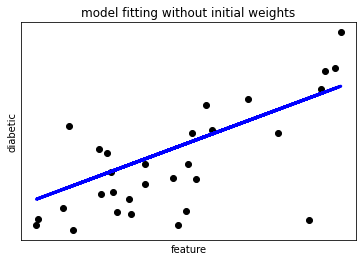

In [568]:
#Plot output
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.xlabel("feature")
plt.ylabel("diabetic")
plt.title("model fitting without initial weights")

plt.show()

Only the first feature of the diabetes dataset is used for illustration. The line plot shows how well linear regression model fitting seeks to find a straight line that best minimizes the residual sum of squares between the observed responses (Y_test) in the dataset, and the responses predicted by the model (Y_predicted).

In [569]:
#Fit or train Linear regression model to train dataset with initial random weights
reg = LinearRegression().fit(diabetes_X_train, diabetes_y_train, sample_weight = np.random.uniform(low=0.0, high=10.0, size=(412,)))
print("model parameters:", reg.get_params)

model parameters: <bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>


In [570]:
#predict target value for test dataest on trained model
diabetes_y_pred = reg.predict(diabetes_X_test)
print(diabetes_y_pred)

[231.47648428 150.93623318 157.98350515 159.99701143 226.44271858
 218.38869347 128.78766413 100.59857624 117.7133796  167.0442834
 224.4292123  114.69312019 162.01051771 113.68636705 119.72688588
 156.97675201 234.49674369 120.73363902  98.58506997 122.7471453
 203.28739639  95.56481055 152.94973946 129.79441727  82.47701975
 170.06454281 136.84168924 136.84168924 188.18609931  83.48377289]


In [571]:
#print model metrics
print('Coefficient of feature after training:', reg.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficient of feature after training: [934.07112715]
Mean squared error: 2978.73
Coefficient of determination: 0.42


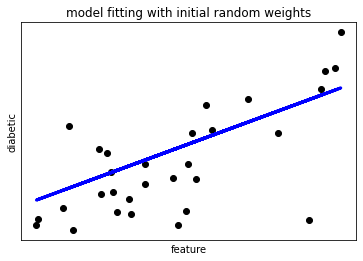

In [572]:
#Plot output
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.xlabel("feature")
plt.ylabel("diabetic")
plt.title("model fitting with initial random weights")

plt.show()